## Imports

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
team = pd.read_csv('/content/drive/MyDrive/2k/team box score - Sheet1.csv')
opp = pd.read_csv('/content/drive/MyDrive/2k/opp box score - Sheet1.csv')
score = pd.read_csv('/content/drive/MyDrive/2k/Game Score - Sheet1.csv')

In [ ]:
print(round(team.shape[0] / 6) , "games played")

67 games played


## Make Columns

In [ ]:
# make a field goal percentage column for our team
FGP = (team['Field Goal Made'] / team['Field Goal Attempted']) * 100
team['Field Goal %'] = FGP

#make a 3 point percentage column for our team
TPP = (team['3 Point Made'] / team['3 Point Attempted']) * 100
team['3 Point %'] = TPP

# make a fantasy PPG column using new default system for our team
FPP = team['Points'] + team['Rebounds'] + 2* team['Assists'] + 4* team['Steals'] + 4* team['Blocks'] - 2* team['Turnovers'] + 2 * team['Field Goal Made'] - team['Field Goal Attempted'] + team['3 Point Made']
team['Fantasy PPG'] = FPP

In [ ]:
# make a field goal percentage column for the opps
FGP = (opp['Field Goal Made'] / opp['Field Goal Attempted']) * 100
opp['Field Goal %'] = FGP

#make a 3 point percentage column for the opps
TPP = (opp['3 Point Made'] / opp['3 Point Attempted']) * 100
opp['3 Point %'] = TPP

# make a fantasy PPG column using new default system for the opps
FPP = (opp['Points'] + opp['3 Point Made'] - opp['Field Goal Attempted'] + 2 * (opp['Field Goal Made']) + opp['Rebounds'] + 2 * (opp['Assists']) + 4 * (opp['Steals']) + 4 * (opp['Blocks']) - 2 * (opp['Turnovers']))
opp['Fantasy PPG'] = FPP

## Team and Opp Averages

In [ ]:
# holds the name of each player
unique_names = team['Name'].dropna().unique()

# groups all the data together based on the player name
avg = team.groupby('Name')

# This is the data frame that holds the average statistics
team_avg = pd.DataFrame()

# iterate over each player in the unique_names array
for name in unique_names:

    # retrieve the stats corresponding to a specific player from the avg variable and take the mean of all that
    avg_stats = round(avg.get_group(name).mean(), 1)

    # assigns the average statistics for a specific player to the corresponding column in the team_avg DataFrame.
    team_avg[name] = avg_stats
team_avg.drop(['Game Played'], inplace = True)
team_avg

<ipython-input-7-985ae915a1b2>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_stats = round(avg.get_group(name).mean(), 1)
<ipython-input-7-985ae915a1b2>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_stats = round(avg.get_group(name).mean(), 1)
<ipython-input-7-985ae915a1b2>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of num

,Kiran,Taser,Nav,Random,Vish,Manraj
Points,24.9,11.4,15.0,6.7,12.4,2.0
Rebounds,2.2,1.7,2.6,4.9,19.1,1.0
Assists,7.7,4.4,3.7,3.2,7.3,3.0
Steals,2.4,1.1,0.9,1.6,1.3,0.0
Blocks,0.7,0.4,1.5,0.6,2.1,1.0
Fouls,1.0,1.2,1.7,1.3,1.6,1.0
Turnovers,2.4,1.5,2.7,1.2,2.3,2.0
Field Goal Made,11.4,4.6,5.7,2.8,6.1,1.0
Field Goal Attempted,16.6,10.6,14.1,6.0,11.6,1.0
3 Point Made,1.5,2.1,2.8,0.8,0.0,0.0


In [ ]:
# Kiran guards Random #1
# Taser guards Random #2
# Nav guards Random #3
# Random guards Random #4
# Vishal guards Random #5

unique_opp_names = opp['Name'].dropna().unique()

avg_opp = opp.groupby('Name')

opp_avg = pd.DataFrame()

for name in unique_opp_names:
    avg_opp_stats = round(avg_opp.get_group(name).mean(), 1)
    opp_avg[name] = avg_opp_stats

opp_avg

<ipython-input-8-f8d4fdf5733c>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_opp_stats = round(avg_opp.get_group(name).mean(), 1)
<ipython-input-8-f8d4fdf5733c>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_opp_stats = round(avg_opp.get_group(name).mean(), 1)
<ipython-input-8-f8d4fdf5733c>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify 

,Random #1,Random #2,Random #3,Random #4,Random #5
Points,13.8,13.8,13.2,12.5,12.9
Rebounds,2.3,2.6,5.3,5.0,12.2
Assists,6.3,3.7,3.2,3.9,3.5
Steals,1.9,1.5,1.4,1.4,1.1
Blocks,0.2,0.4,0.7,0.9,2.1
Fouls,1.2,1.0,0.8,0.7,1.0
Turnovers,2.6,1.7,1.8,1.9,1.8
Field Goal Made,5.6,5.6,5.5,4.9,5.4
Field Goal Attempted,12.9,11.4,12.8,10.3,11.5
3 Point Made,2.0,2.0,1.6,1.9,1.5


## Max Stats

In [ ]:
# these are our max stats
players = team['Name'].unique()

for player in players:
    player_stats = team[team['Name'] == player].max()
    print(f"Player: {player}")
    for column, value in player_stats.iteritems():
        print(f"{column}: {value}")
    print()

Player: Kiran
Name: Kiran
Points: 52.0
Rebounds: 7.0
Assists: 17.0
Steals: 6.0
Blocks: 3.0
Fouls: 4.0
Turnovers: 8.0
Field Goal Made: 23.0
Field Goal Attempted: 33.0
3 Point Made: 5.0
3 Point Attempted: 8.0
Game Played: 67.0
Field Goal %: 100.0
3 Point %: 100.0
Fantasy PPG: 110.0

Player: Taser
Name: Taser
Points: 34.0
Rebounds: 5.0
Assists: 11.0
Steals: 4.0
Blocks: 4.0
Fouls: 5.0
Turnovers: 5.0
Field Goal Made: 12.0
Field Goal Attempted: 24.0
3 Point Made: 10.0
3 Point Attempted: 17.0
Game Played: 67.0
Field Goal %: 100.0
3 Point %: 100.0
Fantasy PPG: 57.0

Player: Nav
Name: Nav
Points: 42.0
Rebounds: 9.0
Assists: 9.0
Steals: 5.0
Blocks: 6.0
Fouls: 5.0
Turnovers: 9.0
Field Goal Made: 16.0
Field Goal Attempted: 35.0
3 Point Made: 11.0
3 Point Attempted: 25.0
Game Played: 67.0
Field Goal %: 85.71428571428571
3 Point %: 100.0
Fantasy PPG: 80.0

Player: Random
Name: Random
Points: 33.0
Rebounds: 19.0
Assists: 9.0
Steals: 8.0
Blocks: 4.0
Fouls: 6.0
Turnovers: 5.0
Field Goal Made: 13.0
Fiel

<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in player_stats.iteritems():
<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in player_stats.iteritems():
<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in player_stats.iteritems():
<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in player_stats.iteritems():
<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in player_stats.iteritems():
<ipython-input-9-ae5dc728a7ce>:7: FutureWarning: iteritems is deprecated and will be 

## Compare Averages

In [ ]:
compare_avg = pd.concat([team_avg, opp_avg], axis = 1)
compare_avg

,Kiran,Taser,Nav,Random,Vish,Manraj,Random #1,Random #2,Random #3,Random #4,Random #5
Points,24.9,11.4,15.0,6.7,12.4,2.0,13.8,13.8,13.2,12.5,12.9
Rebounds,2.2,1.7,2.6,4.9,19.1,1.0,2.3,2.6,5.3,5.0,12.2
Assists,7.7,4.4,3.7,3.2,7.3,3.0,6.3,3.7,3.2,3.9,3.5
Steals,2.4,1.1,0.9,1.6,1.3,0.0,1.9,1.5,1.4,1.4,1.1
Blocks,0.7,0.4,1.5,0.6,2.1,1.0,0.2,0.4,0.7,0.9,2.1
Fouls,1.0,1.2,1.7,1.3,1.6,1.0,1.2,1.0,0.8,0.7,1.0
Turnovers,2.4,1.5,2.7,1.2,2.3,2.0,2.6,1.7,1.8,1.9,1.8
Field Goal Made,11.4,4.6,5.7,2.8,6.1,1.0,5.6,5.6,5.5,4.9,5.4
Field Goal Attempted,16.6,10.6,14.1,6.0,11.6,1.0,12.9,11.4,12.8,10.3,11.5
3 Point Made,1.5,2.1,2.8,0.8,0.0,0.0,2.0,2.0,1.6,1.9,1.5


In [ ]:
a = 0
print("We as a team, combine for a total average of: ")
for i in team_avg.index[0:11]:
  print(round(team_avg.iloc[a,:].sum(), 1) , i)
  a += 1

print((round(team_avg.iloc[7,:].sum(), 1) / round(team_avg.iloc[8,:].sum(), 1)) * 100, team_avg.index[11])
print(round((round(team_avg.iloc[9,:].sum(), 1) / round(team_avg.iloc[10,:].sum(), 1)) * 100, 1), team_avg.index[12])

print(" ")

b = 0
print("The opps as a team combine for a total average of: ")
for i in opp_avg.index[0:11]:
  print(round(opp_avg.iloc[b,:].sum(), 1) , i)
  b += 1

print(round((round(opp_avg.iloc[7,:].sum(), 1) / round(opp_avg.iloc[8,:].sum(), 1)) * 100, 1), opp_avg.index[11])
print(round((round(opp_avg.iloc[9,:].sum(), 1) / round(opp_avg.iloc[10,:].sum(), 1)) * 100, 1), opp_avg.index[12])

We as a team, combine for a total average of: 
72.4 Points
31.5 Rebounds
29.3 Assists
7.3 Steals
6.3 Blocks
7.8 Fouls
12.1 Turnovers
31.6 Field Goal Made
59.9 Field Goal Attempted
7.2 3 Point Made
18.8 3 Point Attempted
52.75459098497496 Field Goal %
38.3 3 Point %
 
The opps as a team combine for a total average of: 
66.2 Points
27.4 Rebounds
20.6 Assists
7.3 Steals
4.3 Blocks
4.7 Fouls
9.8 Turnovers
27.0 Field Goal Made
58.9 Field Goal Attempted
9.0 3 Point Made
22.3 3 Point Attempted
45.8 Game Played
40.4 Field Goal %


In [ ]:
a = 0
b = 0
print("We as a team average more/less of these statistics: ")
for i in team_avg.index[0:11]:
  print(round(round(team_avg.iloc[a,:].sum(), 1) - round(opp_avg.iloc[b,:].sum(), 1), 1), i)
  a += 1
  b += 1


We as a team average more/less of these statistics: 
6.2 Points
4.1 Rebounds
8.7 Assists
0.0 Steals
2.0 Blocks
3.1 Fouls
2.3 Turnovers
4.6 Field Goal Made
1.0 Field Goal Attempted
-1.8 3 Point Made
-3.5 3 Point Attempted


<ipython-input-13-46309022e59c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = 'Name', y = 'Points', data = team, ci=0)


<Axes: xlabel='Name', ylabel='Points'>

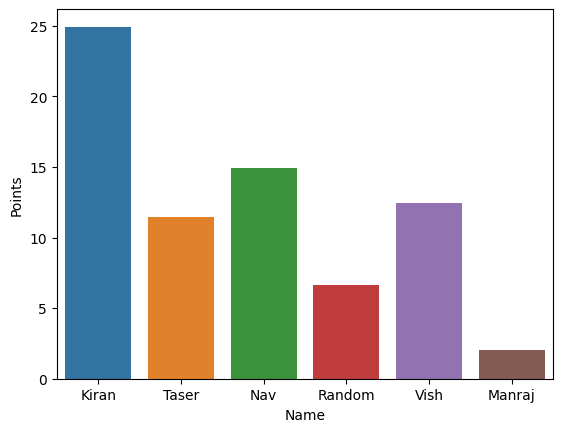

In [ ]:
sns.barplot(x = 'Name', y = 'Points', data = team, ci=0)

## Averages based on Wins

In [ ]:
# Create a boolean mask for winning games
winning_mask = score['Total'] > score['Total'].shift(-1)

# Filter the team DataFrame based on the winning mask
winning_games = score[winning_mask]

In [ ]:
win_list = []
for i in winning_games['Game Played']:
  win_list.append(i)

In [ ]:
# Filter the 'team' dataframe based on the games won
filtered_team = team[team['Game Played'].isin(win_list)]

# Compute the averages for each player
win_avg = round(filtered_team.groupby('Name').mean().transpose(), 1)

# Print the player averages
win_avg

Name,Kiran,Nav,Random,Taser,Vish
Points,26.6,17.3,7.5,13.1,13.5
Rebounds,2.3,2.7,5.7,1.6,21.1
Assists,8.4,4.1,3.7,4.6,8.2
Steals,2.5,0.8,1.5,1.2,1.3
Blocks,0.6,1.6,0.8,0.3,2.4
Fouls,0.8,1.6,1.4,1.2,1.5
Turnovers,2.1,2.4,1.1,1.1,1.9
Field Goal Made,12.3,6.5,3.2,5.3,6.7
Field Goal Attempted,16.6,15.3,6.2,10.9,11.8
3 Point Made,1.5,3.2,0.8,2.4,0.0


In [ ]:
# This is the difference in our stats when we win
win_avg - team_avg

,Kiran,Manraj,Nav,Random,Taser,Vish
3 Point %,8.3,NaN,3.4,1.5,3.7,NaN
3 Point Attempted,-0.2,NaN,0.4,-0.1,0.0,0.0
3 Point Made,0.0,NaN,0.4,0.0,0.3,0.0
Assists,0.7,NaN,0.4,0.5,0.2,0.9
Blocks,-0.1,NaN,0.1,0.2,-0.1,0.3
Fantasy PPG,5.9,NaN,4.9,4.0,4.2,7.4
Field Goal %,5.2,NaN,3.4,7.4,6.8,4.1
Field Goal Attempted,0.0,NaN,1.2,0.2,0.3,0.2
Field Goal Made,0.9,NaN,0.8,0.4,0.7,0.6
Fouls,-0.2,NaN,-0.1,0.1,0.0,-0.1


## Averages based on loses

In [ ]:
# Create a boolean mask for losing games
losing_mask = score['Total'] < score['Total'].shift(-1)

# Filter the team DataFrame based on the losing mask
losing_games = score[losing_mask]

In [ ]:
lose_list = []
for i in losing_games['Game Played']:
  lose_list.append(i)

In [ ]:
# Filter the 'team' dataframe based on the games lost
filtered_team_lose = team[team['Game Played'].isin(lose_list)]

# Compute the averages for each player
lose_avg = round(filtered_team_lose.groupby('Name').mean().transpose(), 1)

# Print the player averages
lose_avg

Name,Kiran,Manraj,Nav,Random,Taser,Vish
Points,22.6,2.0,11.8,5.4,9.1,11.0
Rebounds,2.1,1.0,2.3,3.9,1.8,16.3
Assists,6.8,3.0,3.1,2.6,4.1,6.0
Steals,2.2,0.0,1.0,1.6,1.0,1.4
Blocks,0.8,1.0,1.4,0.3,0.5,1.8
Fouls,1.2,1.0,1.8,1.3,1.2,1.7
Turnovers,2.9,2.0,3.2,1.4,2.0,3.0
Field Goal Made,10.2,1.0,4.5,2.3,3.6,5.4
Field Goal Attempted,16.5,1.0,12.4,5.6,10.2,11.2
3 Point Made,1.4,0.0,2.2,0.7,1.8,0.0


In [ ]:
# This is the difference in our averages when we lose
lose_avg - team_avg

,Kiran,Manraj,Nav,Random,Taser,Vish
3 Point %,-10.8,NaN,-5.1,-1.7,-5.1,NaN
3 Point Attempted,0.4,0.0,-0.4,0.2,0.0,0.0
3 Point Made,-0.1,0.0,-0.6,-0.1,-0.3,0.0
Assists,-0.9,0.0,-0.6,-0.6,-0.3,-1.3
Blocks,0.1,0.0,-0.1,-0.3,0.1,-0.3
Fantasy PPG,-8.1,0.0,-6.9,-5.6,-5.9,-10.5
Field Goal %,-7.1,0.0,-4.7,-10.1,-9.5,-5.9
Field Goal Attempted,-0.1,0.0,-1.7,-0.4,-0.4,-0.4
Field Goal Made,-1.2,0.0,-1.2,-0.5,-1.0,-0.7
Fouls,0.2,0.0,0.1,0.0,0.0,0.1


## Trends of wins and loses

In [ ]:
a = 0
b = 1
win = 0
lose = 0
result = []
for i in range(int(max(team['Game Played']))):
  if (score['Total'][a] - score['Total'][b]) > 0:
    result.append(1)
    win += 1
  else:
    result.append(0)
    lose += 1
  a += 3
  b += 3

print("Our record is:" , win , "-" , lose)

Our record is: 39 - 28


In [ ]:
new_list = []
counter = 0
for element in result:
    if element == 1:
        counter += 1
    else:
        counter -= 1
    new_list.append(counter)

In [ ]:
data = [i for i in range(int(max(team['Game Played'])))]

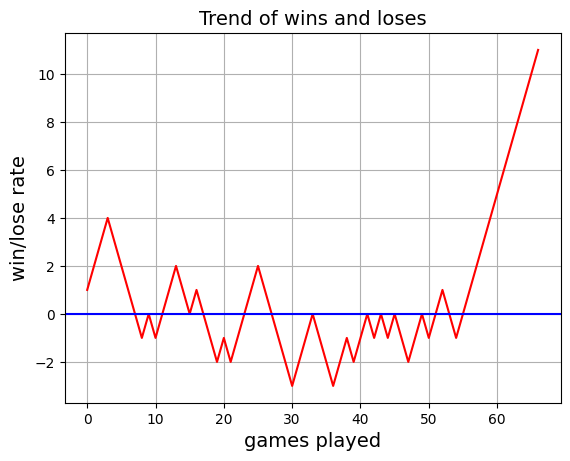

In [ ]:
# This is a trend chart that shows our trend of wins and loses
plt.plot(data, new_list, color='red')
plt.axhline(y = 0, color = 'b', linestyle = '-')
plt.title('Trend of wins and loses', fontsize=14)
plt.xlabel('games played', fontsize=14)
plt.ylabel('win/lose rate', fontsize=14)
plt.grid(True)
plt.show()

## Average stats over time

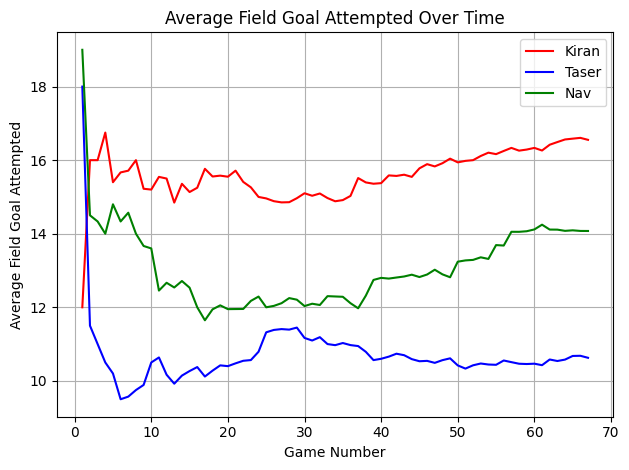

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_statistic_over_time(team, statistic, players_to_include=None):
    # Calculate the cumulative sum for each player
    cumulative_sum = team.groupby('Name')[statistic].cumsum()

    # Calculate the average by dividing the cumulative sum by the game number
    team['Average'] = cumulative_sum / team.groupby('Name')['Game Played'].cumcount().add(1)

    # Define custom line style and colors for each player
    line_style = '-'
    colors = ['red', 'blue', 'green', 'orange', 'purple']

    # Get the list of unique players
    players = team['Name'].unique()

    # Determine the players to include in the graph
    if players_to_include is None or 'all' in players_to_include:
        players_to_include = None
    else:
        players_to_include = [player for player in players_to_include if player in players]

    # Iterate over each player and create a line chart for their average statistic
    for i, player in enumerate(players):
        if players_to_include is None or player in players_to_include:
            player_df = team[team['Name'] == player]
            color = colors[i % len(colors)]
            plt.plot(player_df['Game Played'], player_df['Average'], label=player, linestyle=line_style, color=color)

    # Add labels and title to the chart
    plt.xlabel('Game Number')
    plt.ylabel(f'Average {statistic}')
    plt.title(f'Average {statistic} Over Time')

    # Add a legend to distinguish players, excluding NaN
    filtered_players = [player for player in players if isinstance(player, str) and not pd.isnull(player)]
    plt.legend(filtered_players)

    # Set gridlines
    plt.grid(True)

    # Adjust layout and spacing
    plt.tight_layout()

    # Display the chart
    plt.show()

# Example usage with your existing team DataFrame
team = team  # Replace with your existing team DataFrame

# Change the statistic here
statistic_to_plot = 'Field Goal Attempted'

# Choose the players to include in the graph
players_to_include = ['Kiran', 'Nav', 'Taser']

plot_average_statistic_over_time(team, statistic_to_plot, players_to_include)